In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import deprecated
%matplotlib inline

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('S:/Projects/HeartAttack/Heart-Attack-Prediction/data/heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print('Then number of rows are {}'.format(data.shape[0]) ,'and the number of columns are {}'.format(data.shape[1]))

Then number of rows are 303 and the number of columns are 14


In [7]:
#finding out the NaN values in each column
null_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
print('There are {} null features'.format(null_features))

There are [] null features


**As you can see there are no NaN features in this dataset.**

In [8]:
#checking for duplicate rows
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
s_0 = data.sex.value_counts()[0]  #sex 0 count
s_1 = data.sex.value_counts()[1]  #sex 1 count   
print('Sex 0 : ',s_0, 'Sex 1 : ',s_1)

Sex 0 :  96 Sex 1 :  206


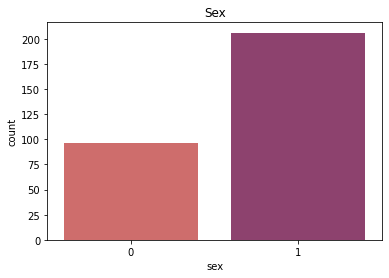

In [11]:
#plotting Sex 0 and Sex 1
sns.countplot(data=data, x="sex", palette="flare")
plt.title("Sex")
plt.show()

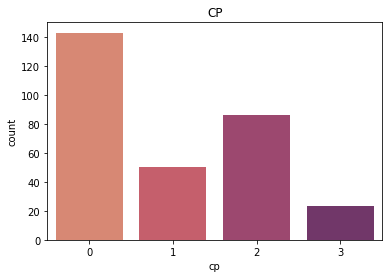

In [12]:
#plotting chest pain type
sns.countplot(data=data, x='cp', palette='flare')
plt.title("CP")
plt.show()

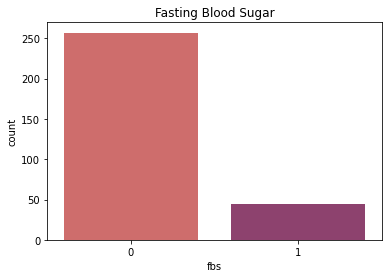

In [13]:
sns.countplot(data=data, x='fbs', palette='flare')
plt.title("Fasting Blood Sugar")
plt.show()

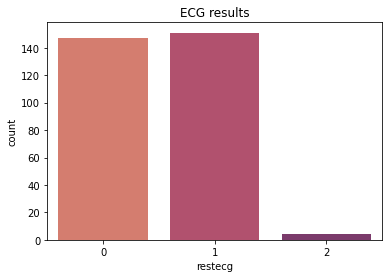

In [14]:
sns.countplot(data=data, x='restecg', palette='flare')
plt.title("ECG results")
plt.show()

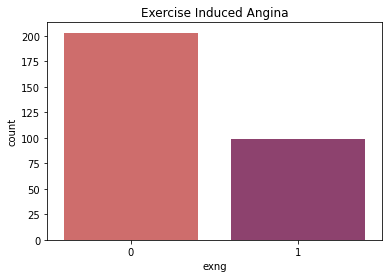

In [15]:
sns.countplot(data=data, x='exng', palette='flare')
plt.title("Exercise Induced Angina")
plt.show()

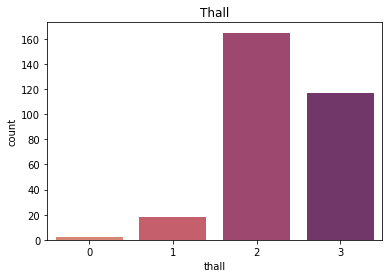

In [16]:
sns.countplot(data=data, x='thall', palette='flare')
plt.title("Thall")
plt.show()

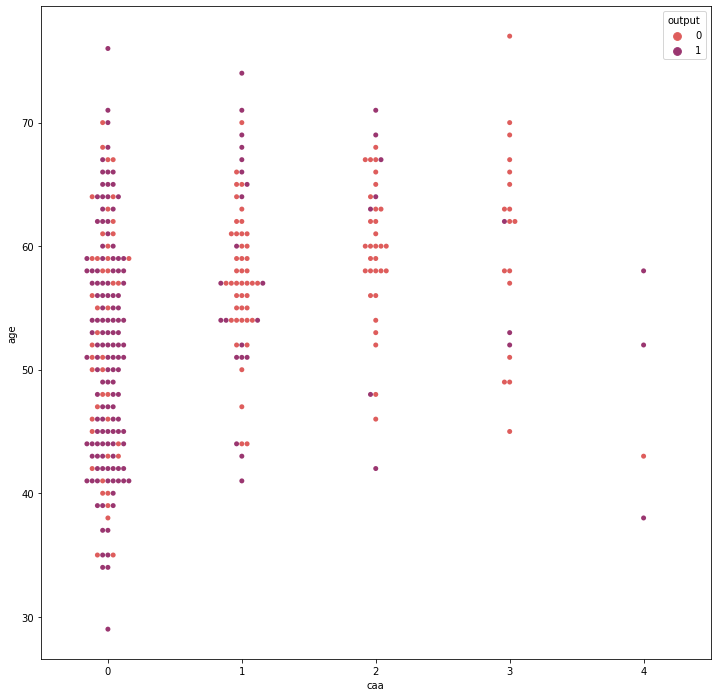

In [17]:
plt.figure(figsize = (12,12))
sns.swarmplot(x=data['caa'],y=data['age'],hue=data['output'], palette='flare')
plt.show()

Category 0 - Most prone to Heart Attack
<br>
Category 1,2,3 - similar at risk
<br>
Category 4 - Very less people but majority are prone to heart attack

**OUTLIERS**

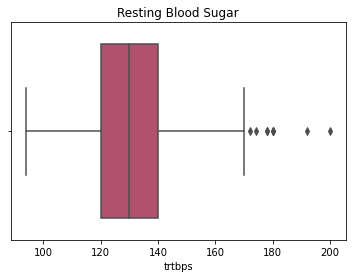

In [18]:
sns.boxplot(data=data, x='trtbps', palette='flare')
plt.title("Resting Blood Sugar")
plt.show()

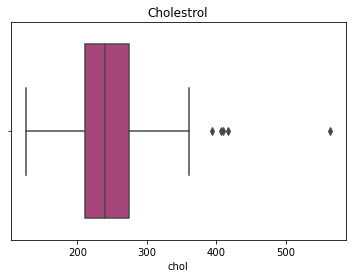

In [19]:
sns.boxplot(data=data, x='chol', palette='magma')
plt.title("Cholestrol")
plt.show()

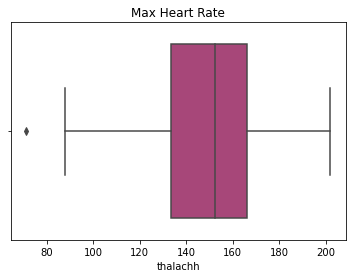

In [20]:
sns.boxplot(data=data, x='thalachh', palette='magma')
plt.title("Max Heart Rate")
plt.show()

**DENSITY DISTRIBUTION**

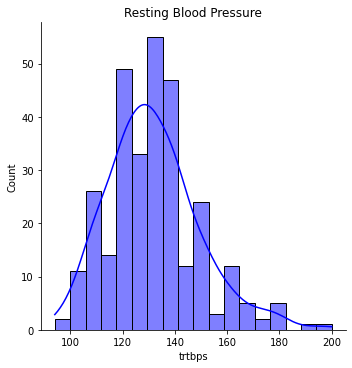

In [21]:
sns.displot(data=data, x='trtbps',kde=True,color='blue')
plt.title("Resting Blood Pressure")
plt.show()

As you can infer from this graph, maximum people have normal blood pressure while a few have abnormal blood pressures(too low or too high).

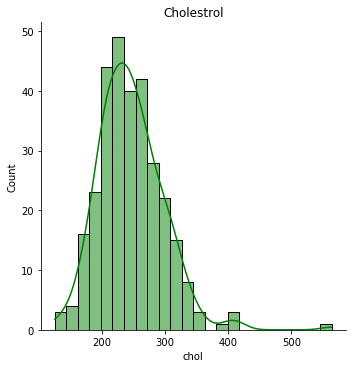

In [22]:
sns.displot(data=data, x='chol',kde=True,color='green')
plt.title("Cholestrol")
plt.show()

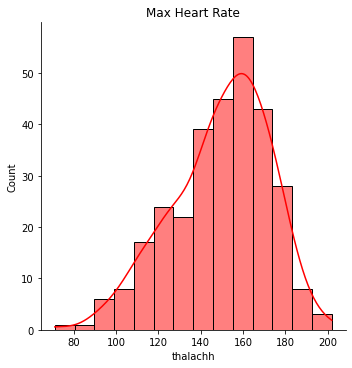

In [23]:
sns.displot(data=data, x='thalachh',kde=True,color='red')
plt.title("Max Heart Rate")
plt.show()

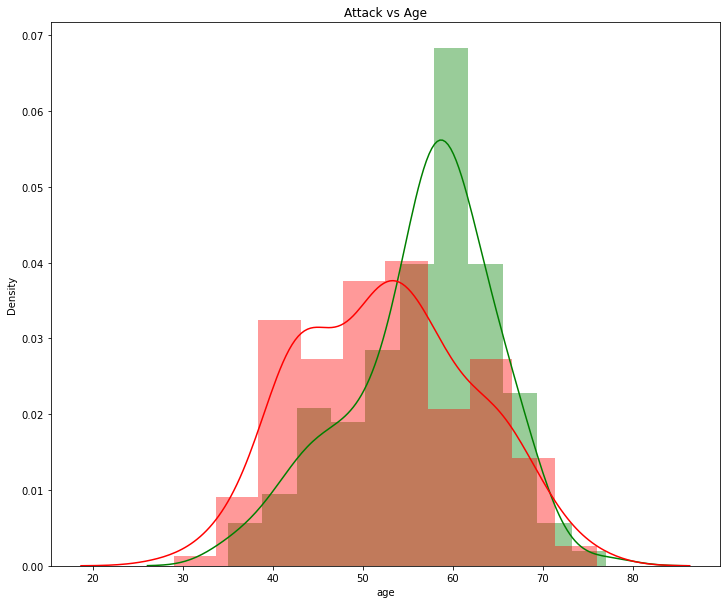

In [24]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['age'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['age'], color='red',kde=True)
plt.title('Attack vs Age')
plt.show()

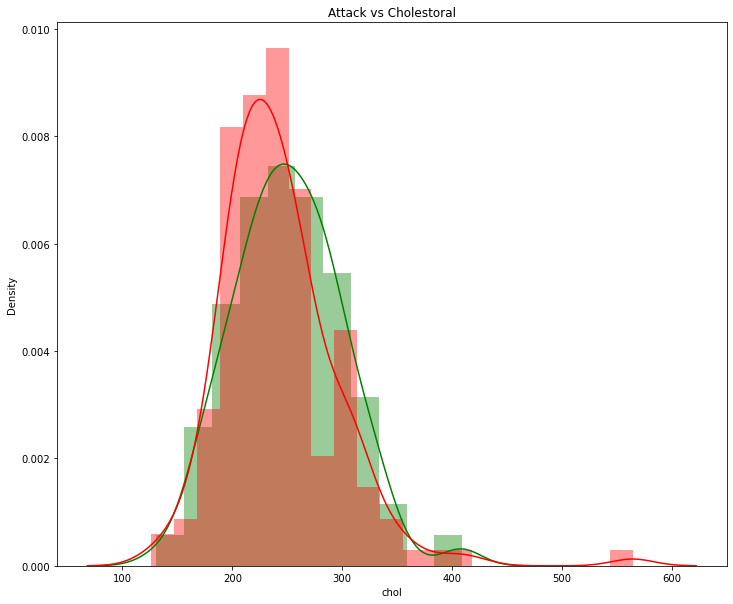

In [25]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['chol'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['chol'], color='red',kde=True)
plt.title('Attack vs Cholestoral')
plt.show()

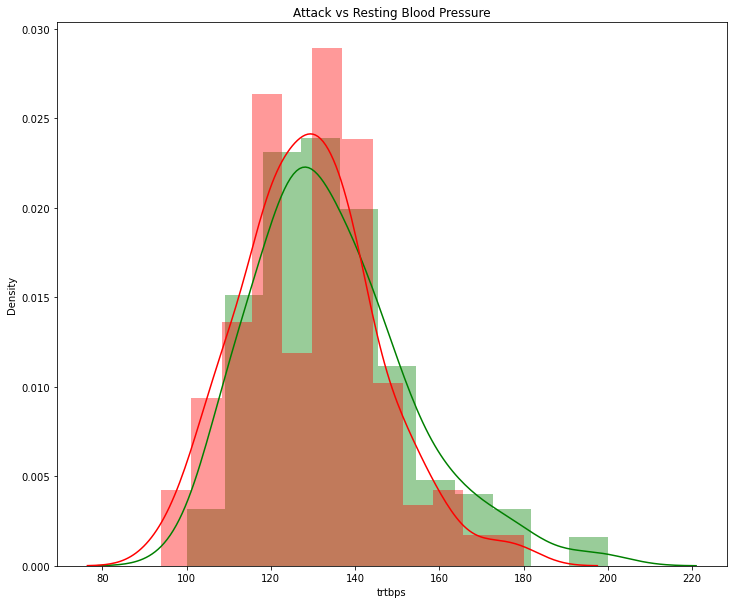

In [26]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['trtbps'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['trtbps'], color='red',kde=True)
plt.title('Attack vs Resting Blood Pressure')
plt.show()

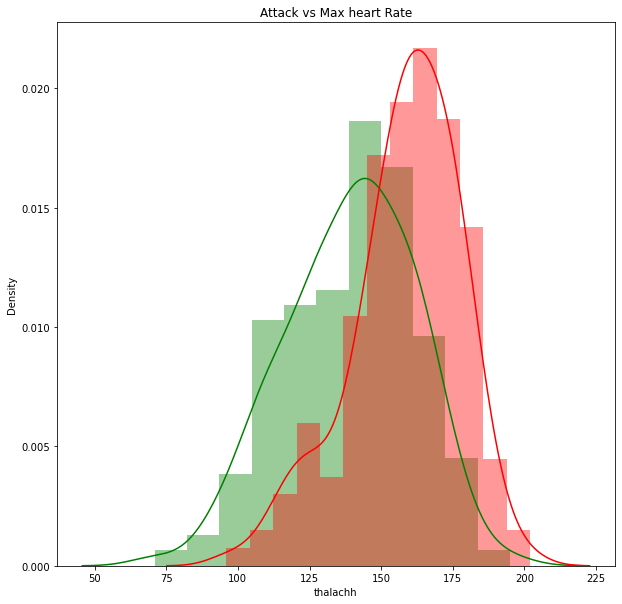

In [27]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['output'] == 0]['thalachh'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['thalachh'], color='red',kde=True)
plt.title('Attack vs Max heart Rate')
plt.show()

<Figure size 1440x1440 with 0 Axes>

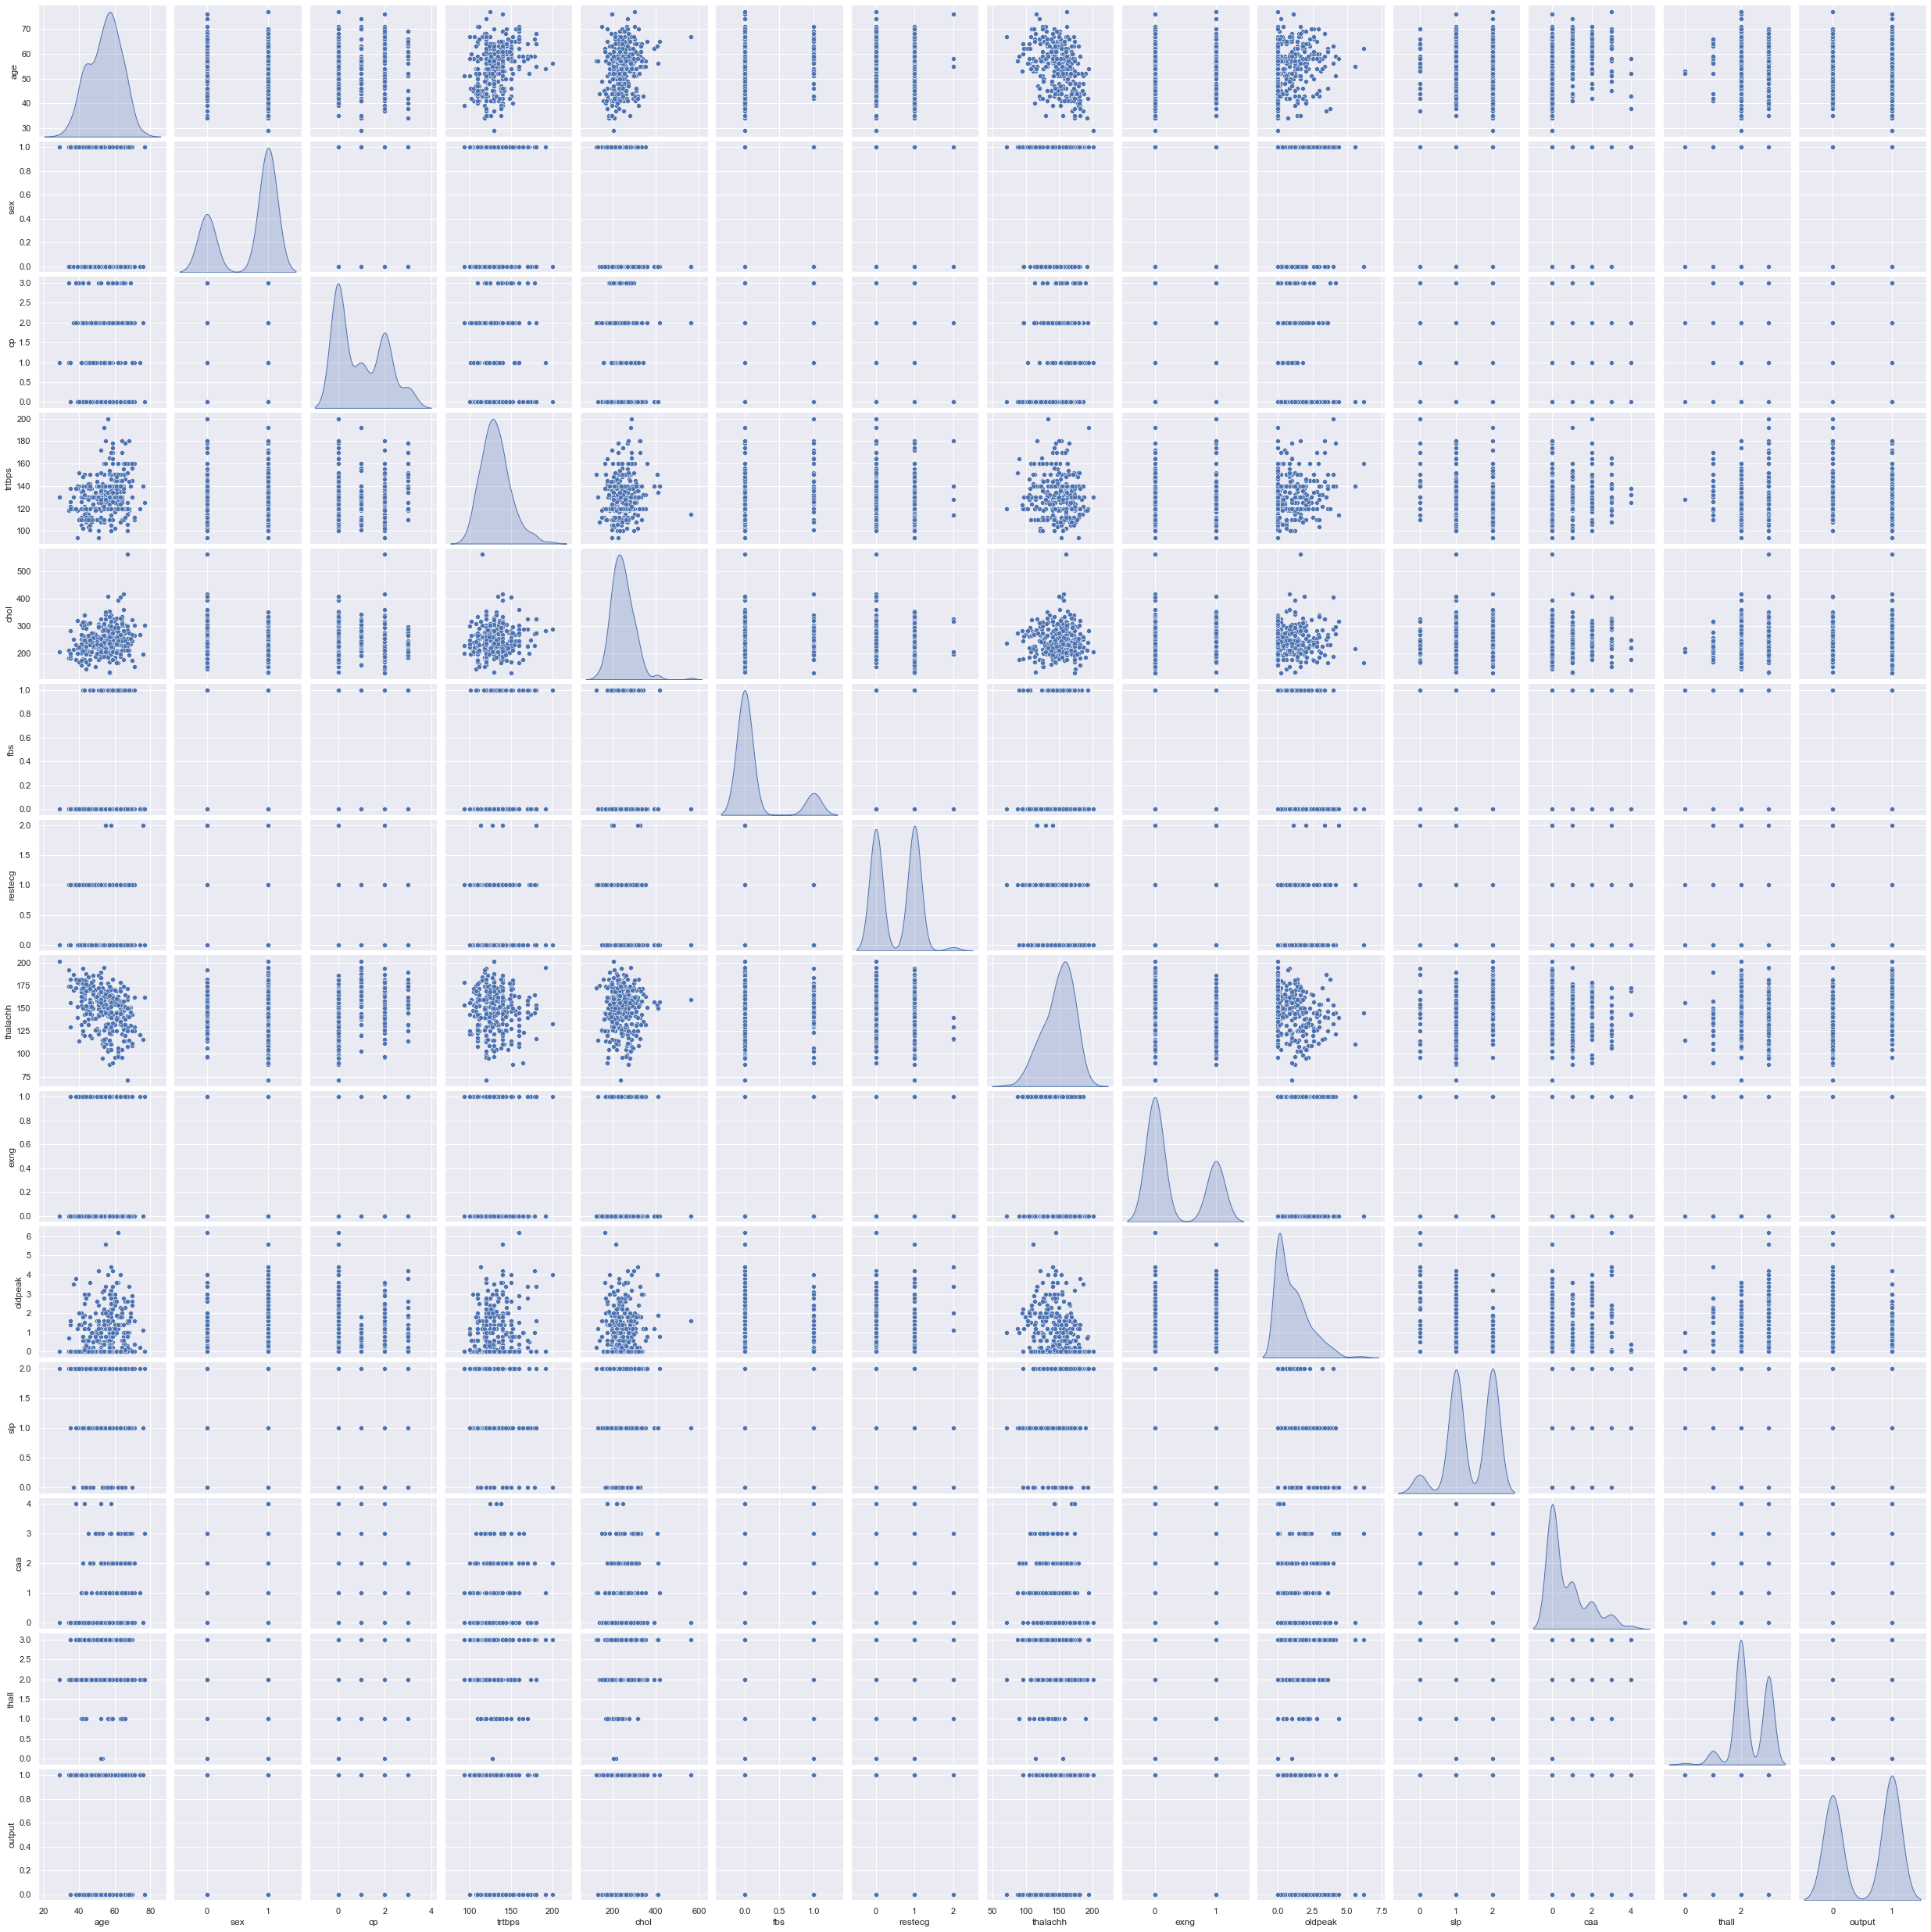

In [28]:
plt.figure(figsize=(20,20))
sns.set(style = "darkgrid")
sns.pairplot(data, palette="icefire", diag_kind="kde")
plt.show()

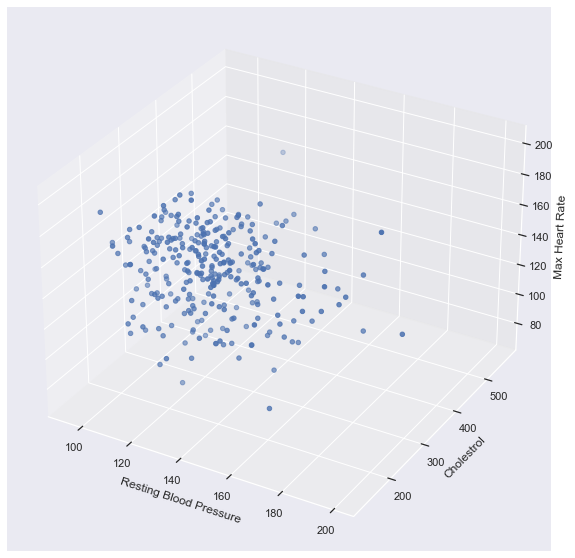

In [29]:
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')
x = data['trtbps']
y = data['chol']
z = data['thalachh']

ax.set_xlabel("Resting Blood Pressure")
ax.set_ylabel("Cholestrol")
ax.set_zlabel("Max Heart Rate ")

ax.scatter(x,y,z)
plt.show()

**DATA PREPROCESSING**

In [30]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values

In [47]:
X.shape

(302, 12)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [32]:
print('Shape:',X_train.shape)
print('Shape:',X_test.shape)
print('Shape:',y_train.shape)
print('Shape:',y_test.shape)

Shape: (241, 12)
Shape: (61, 12)
Shape: (241,)
Shape: (61,)


**Feature Scaling**

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training using LazyClassifier**

In [34]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 48.32it/s]


In [35]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.92,0.92,0.92,0.92,0.02
NuSVC,0.92,0.92,0.92,0.92,0.01
GaussianNB,0.89,0.89,0.89,0.89,0.02
KNeighborsClassifier,0.89,0.89,0.89,0.89,0.01
ExtraTreesClassifier,0.89,0.89,0.89,0.89,0.08
AdaBoostClassifier,0.89,0.88,0.88,0.88,0.07
NearestCentroid,0.89,0.88,0.88,0.88,0.02
LogisticRegression,0.89,0.88,0.88,0.88,0.00
LinearSVC,0.89,0.88,0.88,0.88,0.02


**FROM THIS WE CAN SEE THAT SVC HAS THE HIGHEST ACCURACY**

In [36]:
model = SVC()
model.fit(X_train, y_train)
  
predicted_svm = model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted_svm)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


In [37]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

predicted = grid.predict(X_test)
print("\nThe accuracy of GridSearch is : ", accuracy_score(y_test, predicted)*100, "%")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.755, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.771, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.812, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.531, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.0s finished


In [38]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [39]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.0001)


In [40]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



**FROM THIS WE CAN SEE THAT EVEN AFTER TUNING HYPERPARAMETERS USING GRIDSEARCHCV, THE RESULTS ARE THE SAME.**

In [41]:
print("The accuracy of final model is : ", accuracy_score(y_test, predicted_svm)*100, "%")

The accuracy of final model is :  91.80327868852459 %


In [42]:
import pickle
file = open('SVM_model.pkl', 'wb')
pickle.dump(model, file)